In [1]:
import numpy as np
import matplotlib.pyplot as plt

from run_job import run_qite
from qforte import Molecule, system_factory

from geometries.chain_geom import get_h10chain_geom as chain
from geometries.pyramid_geom import get_h10pyr_geom as pyrmd
from geometries.ring_geom import get_h10ring_geom as ring
from geometries.sheet_geom import get_h10sheet_geom as sheet

In [2]:
h10_path = '/home/vlita/Desktop/rsrch/2025_sqite/h10/'
polyacine_path = '/home/vlita/Desktop/rsrch/2025_sqite/polyacine/'

mol = system_factory(build_type='psi4', mol_geometry=chain(0.50), basis='sto-6g', run_fci=True)
print(f'The FCI energy from Psi4:                                    {mol.fci_energy:12.10f}')
print(f'The HF energy from Psi4:                                     {mol.hf_energy:12.10f}')

 ==> Psi4 geometry <==
-------------------------
0  1
H  0.0  0.0  2.25
H  0.0  0.0  1.75
H  0.0  0.0  1.25
H  0.0  0.0  0.75
H  0.0  0.0  0.25
H  0.0  0.0  -0.25
H  0.0  0.0  -0.75
H  0.0  0.0  -1.25
H  0.0  0.0  -1.75
H  0.0  0.0  -2.25
symmetry c1
units angstrom

  Memory set to   1.863 GiB by Python driver.
The FCI energy from Psi4:                                    -3.4159428720
The HF energy from Psi4:                                     -3.3473055337


In [3]:
h10_beta, h10_energy, h10_param, h10_cnot, h10_measure = run_qite(
    mol,
    beta=1.0,
    db=0.2,
    dt=0.01,
    expansion_type='SD',
    second_order=True,
    output_path=h10_path)


b = [float(item) for item in h10_beta]
e = [abs(float(item) - mol.fci_energy) for item in h10_energy]
p = [int(item) for item in h10_param]
c = [int(item) for item in h10_cnot]
m = [int(item) for item in h10_measure]


-----------------------------------------------------
     Quantum Imaginary Time Evolution Algorithm   
-----------------------------------------------------


                 ==> QITE options <==
-----------------------------------------------------------
Computer Type:                            fci
Trial reference state:                    |11111111110000000000>
Number of Hamiltonian Pauli terms:        7151
Trial state preparation method:           occupation_list
Trotter order (rho):                      1
Trotter number (m):                       1
Use fast version of algorithm:            True


Total imaginary evolution time (beta):    1.0
Imaginary time step (db):                 0.2


Use Folded Spectrum:                      False


Use CIS Reference:                        False


Use exact evolutoin:                      False


Expansion type:                           SD
Use DIIS:                                 False
Max DIIS size:                            False
Us

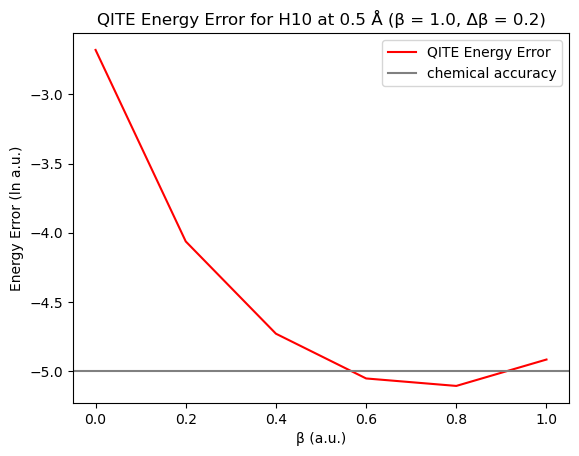

In [ ]:
plt.plot(b, np.log(e), label='QITE Energy Error', linestyle='-', color='red')
plt.axhline(y=-5, color='grey', linestyle='-', label='chemical accuracy')

plt.xlabel('β (a.u.)')
plt.ylabel('Energy Error (ln a.u.)')
plt.title(f'QITE Energy Error for H10 at 0.5 Å (β = 1.0, Δβ = 0.2)')

# Add a legend
plt.legend()

# Show the plot
plt.show()